<img src="Figs\ul_logo.png" alt="ul_logo" align="left" width="200" height="100"/>

<br/><br/><br/><br/>
<h3><center> Cahier de laboratoire </center></h3><br/><br/><br/><br/><br/>
    
<center> Travaux pratiques avancés (GPH-3000) </center> <br /><br/><br/><br/><br/><br/>

<center> présenté à </center>
<center> Simon Rainville et Michel Piché </center> <br /><br/><br/><br/><br/><br/>

<center> par </center>
<center> Maxence Larose (111 188 447 - maxence.larose.1@ulaval.ca) </center>
<center> Pierre-Olivier Janvier (111 187 987 - pierre-olivier.janvier.1@ulaval.ca) </center><br /><br/><br/><br/><br/><br/><br/>

<center> Automne 2020 </center><br/><br/><br/>

<div style="page-break-after: always;"></div>

#### Expérience 4 : Laser à fibre femtoseconde

Protocole de laboratoire [disponible ici](https://sitescours.monportail.ulaval.ca/contenu/sitescours/036/03613/202009/site121785/modules809962/module1031411/page2793329/bloccontenu2672869/Femto_GPH_A2019.pdf?identifiant=dda6c893d80d9ad1995b7c2e1b319552b3f26694) pour la version 2019, [ici](https://sitescours.monportail.ulaval.ca/contenu/sitescours/036/03613/202009/site121785/modules809962/module1031411/page2793329/bloccontenu2672869/Laser_femto_mise_a_jour_A-2020.pdf?identifiant=f70f6524136e830d758015bab062ca90d936d875) pour les modifications 2020 et [ici pour les suppléments](https://sitescours.monportail.ulaval.ca/contenu/sitescours/036/03613/202009/site121785/modules809962/module1031411/page2793329/bloccontenu2672869/Supplement_Femto_GPH_A2019.pdf?identifiant=8bad304489eb9d9718285acd5ce61300af15c8d3).

## Préparation

**Date de préparation :** 06 octobre 2020

**Date de l'expérimentation :** 08 octobre 2020

**But :Comprendre le fonctionnement d'un laser à fibre dopée erbium avec un cavité anneau tout en caractérisant l'opération de ce laser en régime continu, opérant et observant son comportement lors du régime pulsé.** 

**Objectifs spécifiques:**
- Comprendre le	fonctionnement d’un laser à	fibre dopée	erbium avec	une	
cavité	en	anneau
- Caractériser l’opération de ce laser en régime continu
- Opérer le	laser en régime	pulsé
- Comprendre le phénomène menant à l’émergence des impulsions brèves 
- Caractériser	les	divers	types du régime pulsé
**Matériel nécessaire:**	
- Diode	laser LC96T76-20R
- Fibre	optique	monomode
- Connecteurs
- Fibre optique monomode HI-1060 
- Fibre optique monomode SMF-28 
- Fibre optique	dopée à	l’erbium e-HPW 
- WDM/ISO
- Coupleur 50/50 
- Lame demi-onde FBR-AH3
- Polariseur linéaire Thorlabs FBR-LPNIR
- Lame quart d’onde FBR-AQ3
- Banc optique FBC-1550-FC	
- Contrôleur de	température	pompe TED-200C	 
- Contrôleur de	la	diode laser	pompe LDC-240C
- Support LM 14S2
- Analyseur	de spectre Ando	AQ 6317B
- Puissance-mètre GenTec TPM-3000
- Détecteur	rapide Thorlabs	InGaAs D400FC
- Oscilloscope LeCroy 9362

**Schémas de montage:**
<img src="Figs\schemalaser.png" alt="ul_logo" align="center" style="zoom:75%"/>
<center> FIGURE 1 : Schéma de montage du laser à impulsions brèves.  </center> <br/>

<img src="Figs\schemalames.png" alt="ul_logo" align="center" style="zoom:75%"/>
<center> FIGURE 2 : Schéma de montage du module de polarisation avec les lames et polariseur linéaire.  </center> <br/>

<div style="page-break-after: always;"></div>

## Réalisation

### Partie	1 :	Caractérisation	de	l’émission naturelle en	régime continu

1. La puissance	du laser à	fibre $P_\text{laser}$ est mesurée en fonction de l’alimentation de la diode pompe, et donc de la puissance pompe $P_{\text{pompe}}$.

| $I_{pompe}$ [mA $\pm$ 0.05]|$P_{pompe}$[mW $\pm$ 1]|$P_{laser}$[mW $\pm$ 1]|
|:-----:    |:-----:    |:-----:|
    |0     |0     |  0   |
|      30.00     |     0      |  0   |
|  40.60         |     2      |  0   |
|    50.00       |      7     |  0   |
|     60.00      |     14    |   1  |
|     70.00      |      22     |   3  |
|     80.00      |     28      |  4   |
|90.00 |36| 5 |
|100.00 |43|6|
|200.00 |110|19|
|300.00 |178|32|
|400.00 |244|46|
|500.00 |313|59|
|600.00 |375|71|
|700.00 |442|84|
|800.00 |505|94|
|900.00 |573|105|

<center> Tableau 1 : Comportement de la puissance du laser et de la pompe en fonction de l'alimentation de la diode pompe pour l'émission naturelle.  </center> <br/>

2. 	L’efficacité du laser peut être déterminé en calculant la pente (« slope	efficiency ») du graphique de la puissance $P_\text{laser}$ en fonction de la puissance $P_\text{pompe}$. Il est aussi possible de déterminer la puissance pompe seuil $P_\text{seuil}$ qui permet l'émission laser à l'aide de ce même graphique. On obtient une efficacité de 18.97 % et une puissance seuil de 7.24 mW.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Polynomial Regression
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

    # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)
    ybar = np.sum(y) / len(y) 
    ssreg = np.sum((yhat - ybar) ** 2)
    sstot = np.sum((y - ybar) ** 2)
    results['determination'] = ssreg / sstot

    return results

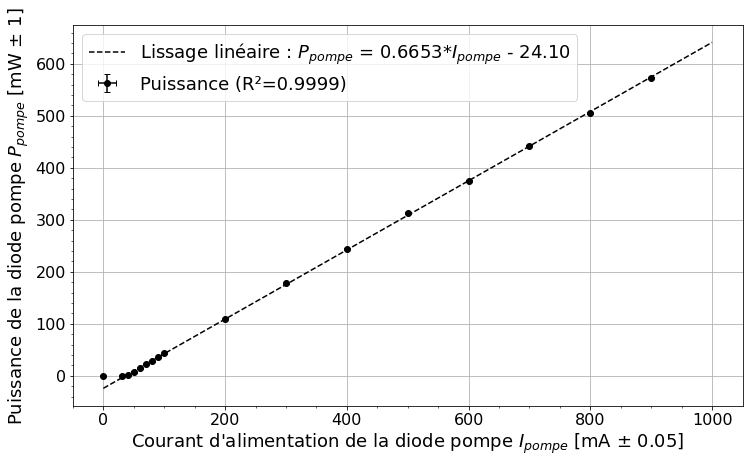

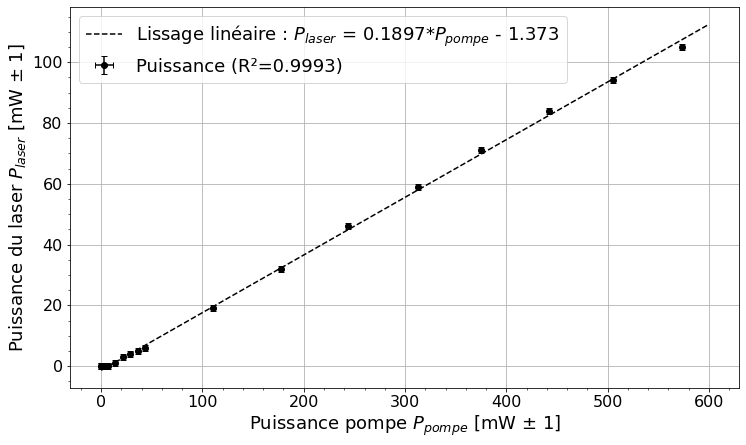

 
0.6653 x - 24.1
{'polynomial': [0.6652675190829509, -24.103821921805356], 'determination': 0.9999038435824076}
 
0.1897 x - 1.373
{'polynomial': [0.18969570221941215, -1.3728985295786522], 'determination': 0.9993191541899288}


In [37]:
filename="Data/Efficacité.txt"

x0 = np.loadtxt(filename, usecols=(0))
x1 = np.loadtxt(filename, usecols=(1))
y1 = np.loadtxt(filename, usecols=(2))

x = np.arange(0.0, 600, 0.1)
t = np.arange(0.0,1000,0.1)
u = polyfit(x0[2:],x1[2:],1)
w = np.polyfit(x0[2:], x1[2:], 1)
a = polyfit(x1[3:], y1[3:], 1)
z = np.polyfit(x1[3:], y1[3:], 1)
g = np.poly1d(w)
f = np.poly1d(z)
plt.figure()

pltTransExp = plt.errorbar(x0, x1, yerr=1, xerr=0.05, linestyle="",
                           marker="o", markersize=6, label="Puissance (R²=0.9999)", capsize=3, ecolor='k', markeredgecolor = 'k',
                           markerfacecolor='k')
plt.plot(t, g(t), 'k--', label ='Lissage linéaire : $P_{pompe}$ = 0.6653*$I_{pompe}$ - 24.10')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlabel("Courant d'alimentation de la diode pompe $I_{pompe}$ [mA $\pm$ 0.05]", fontsize = 18)
plt.ylabel("Puissance de la diode pompe $P_{pompe}$ [mW $\pm$ 1]", fontsize = 18)
plt.legend(fontsize = 18)
plt.grid()
plt.minorticks_on()
fig = plt.gcf()
fig.set_size_inches(12, 7)
fig.savefig('Figs/Pompe.png',bbox_inches = 'tight', dpi=600)
plt.show()

plt.figure()
pltTransExp = plt.errorbar(x1, y1, yerr=1, xerr=1, linestyle="",
                           marker="o", markersize=6, label="Puissance (R²=0.9993)", capsize=3, ecolor='k', markeredgecolor = 'k',
                           markerfacecolor='k')
plt.plot(x, f(x), 'k--', label ='Lissage linéaire : $P_{laser}$ = 0.1897*$P_{pompe}$ - 1.373')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlabel("Puissance pompe $P_{pompe}$ [mW $\pm$ 1]", fontsize = 18)
plt.ylabel("Puissance du laser $P_{laser}$ [mW $\pm$ 1]", fontsize = 18)
plt.legend(fontsize = 18)
plt.grid()
plt.minorticks_on()
fig = plt.gcf()
fig.set_size_inches(12, 7)
fig.savefig('Figs/Efficacité.png',bbox_inches = 'tight', dpi=600)
plt.show()
print(g)
print(u)
print(f)
print(a)

3. Des données spectrables sont acquises à l'aide de l'OSA. La valeur du courant pompe $I_\text{pompe}$ utilisée est de ($900.0~\pm~0.05$) mA. La longueur d’onde du pic central est de ($1559.270~\pm~0.002$) nm. La puissance à ce pic central est de ($3.0~\pm~0.5$) mW. La largeur à –3 dB (FWHM) est de ($0.132~\pm~0.002$) nm et la largeur à -20 dB est de ($1.100~\pm~0.002$) nm. À cette puissance pompe, un seul pic est visible. Toutefois, on remarque que le spectre est composé de deux pics distincts pour des puissances pompes plus faibles. En effet, un pic à une longueur d'onde de ($1559.832~\pm~0.002$) nm est observable, ce qui pourrait signifier que la puissance $P_\text{pompe}$ n'est pas suffisante pour que le laser atteigne une bonne stabilité d'émission. En fait, la raison pour laquelle un second pic apparaît est probablement dû au fait que le gain est localement inhomogène. Les différences de gain entre les deux longueurs dépend de l'intensité. Toutefois, dans une fibre idéale, il n'y aurait pas l'apparition de cette seconde longueur d'onde puisqu'un seul photon serait en mesure d'inverser et de stabiliser le gain.

4. Autres observations : Le laser émet de la lumière verte qui provient d'une transition entre des niveaux supérieurs. Les photons sont en mesure de se rendre à ces niveaux par transition 2 photons. Par ailleurs, l'émission spontannée est autour de 1530 nm alors que l'émission stimulée est autour de 1560 nm. Cette différence est dû au fait que la section d'absorption et d'émission des niveaux 1 et 2 sont différents.

### Partie	2 :	Accordabilité	de	la	longueur	d’onde laser

1. Un filtre passe-bande est introduit dans la cavité laser et les mesures de puissance sont réalisées.

| $I_{pompe}$ [mA $\pm$ 0.05]|$P_{pompe}$[mW $\pm$ 1]|$P_{laser}$[mW $\pm$ 1]|
|:-----:    |:-----:    |:-----:|
|0     |0     |  0   |
|      30.00     |     0      |  0   |
|  40.60         |     2      |  0   |
|    50.00       |      7     |  0   |
|     60.00      |     14    |   0  |
|     70.00      |      22     |   0  |
|     80.00      |     28      |  0   |
|90.00 |36| 0 |
|100.00 |43|0|
|200.00 |110|0|
|300.00 |178|0|
|400.00 |244|1|
|500.00 |313|2|
|600.00 |375|3|
|700.00 |442|3|
|800.00 |505|4|
|900.00 |573|4|

<center> Tableau 3 : Comportement de la puissance du laser et de la pompe en fonction de l'alimentation de la diode pompe pour un laser accordé.  </center> <br/>

2. L’efficacité du laser peut être déterminé en calculant la pente (« slope efficiency ») du graphique de la puissance $P_\text{laser}$ en fonction de la puissance $P_\text{pompe}$, de même que la puissance seuil $P_\text{seuil}$. On obtient une efficacité de 1.035 % et une puissance seuil de 140.9 mW. 

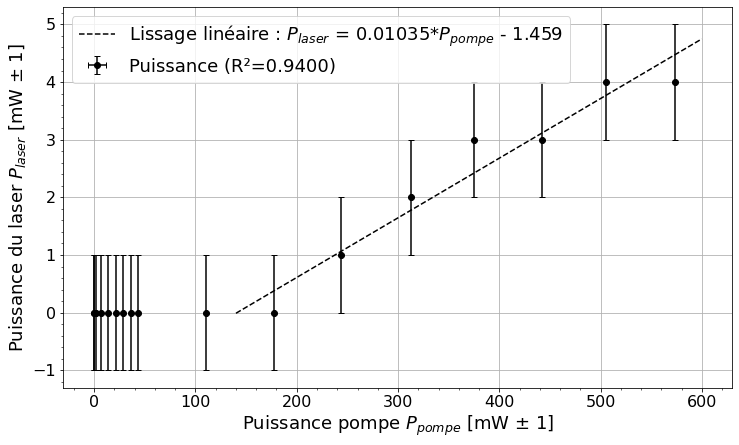

In [56]:
filename="Data/Efficacité_filtre.txt"

x1 = np.loadtxt(filename, usecols=(1))
y1 = np.loadtxt(filename, usecols=(2))

x = np.arange(140, 600, 0.1)
a = polyfit(x1[len(x1)-7:], y1[len(x1)-7:], 1)
z = np.polyfit(x1[len(x1)-7:], y1[len(x1)-7:], 1)
f = np.poly1d(z)

pltTransExp = plt.errorbar(x1, y1, yerr=1, xerr=1, linestyle="",
                           marker="o", markersize=6, label="Puissance (R²=0.9400)", capsize=3, ecolor='k', markeredgecolor = 'k',
                           markerfacecolor='k')
plt.plot(x, f(x), 'k--', label ='Lissage linéaire : $P_{laser}$ = 0.01035*$P_{pompe}$ - 1.459')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlabel("Puissance pompe $P_{pompe}$ [mW $\pm$ 1]", fontsize = 18)
plt.ylabel("Puissance du laser $P_{laser}$ [mW $\pm$ 1]", fontsize = 18)
plt.legend(fontsize = 18)
plt.grid()
plt.minorticks_on()
fig = plt.gcf()
fig.set_size_inches(12, 7)
fig.savefig('Figs/Efficacité_filtre.png',bbox_inches = 'tight', dpi=600)
plt.show()
#print(f)
#print(a)

2. Le filtre est utilisé pour différents angles et la longueur d’onde du laser est mesuré. Le pic à 349° n'est pas mesurable puisque l'intensité de l'émission spontannée amplifiée est supérieure à l'intensité du laser. La plage	d’accordabilité	de la longueur d’onde laser est d'environ de 1527 nm à 1561 nm. Une figure de la longueur d'onde en fonction de l'angle du filtre est réalisée.

| $\lambda_{laser} $[nm $\pm$ 0.002]  |  Angle du filtre [° $\pm$ 0.04] | Intensité [$\mu$W] |
|:-----:|:-----:|:-----:|
| 1527.000 | 343.00 | 550.0 $\pm$ 1|
| 1534.100 | 344.00 | 434.0 $\pm$ 1|
| 1542.200 | 345.00 | 485.0 $\pm$ 4|
| 1549.400 | 346.00 | 410 $\pm$ 20 |
| 1556.100 | 347.00 | 371 $\pm$ 2  |
| 1560.600 | 348.00 | 350 $\pm$ 20  |
|       | 349.00 |   |

<center> Tableau 4 : Longueur d'onde du laser en fonction de l'angle du filtre.  </center> <br/>

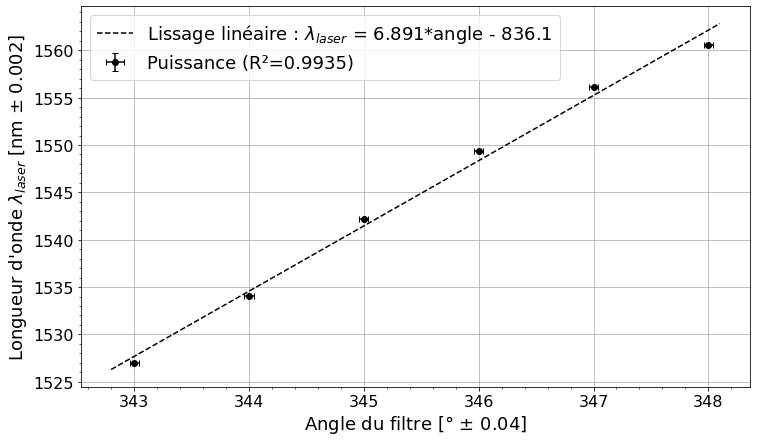

In [57]:
filename="Data/Angle.txt"

x1 = np.loadtxt(filename, usecols=(1))
y1 = np.loadtxt(filename, usecols=(0))

x = np.arange(342.8, 348.2, 0.1)
a = polyfit(x1, y1, 1)
z = np.polyfit(x1, y1, 1)
f = np.poly1d(z)

pltTransExp = plt.errorbar(x1, y1, yerr=0.002, xerr=0.04, linestyle="",
                           marker="o", markersize=6, label="Puissance (R²=0.9935)", capsize=3, ecolor='k', markeredgecolor = 'k',
                           markerfacecolor='k')
plt.plot(x, f(x), 'k--', label ='Lissage linéaire : $\lambda_{laser}$ = 6.891*angle - 836.1')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlabel("Angle du filtre [° $\pm$ 0.04]", fontsize = 18)
plt.ylabel("Longueur d'onde $\lambda_{laser}$ [nm $\pm$ 0.002]", fontsize = 18)
plt.legend(fontsize = 18)
plt.grid()
plt.minorticks_on()
fig = plt.gcf()
fig.set_size_inches(12, 7)
fig.savefig('Figs/Angle.png',bbox_inches = 'tight', dpi=600)
plt.show()
#print(f)
#print(a)

### Partie	4 :	Opération	du laser	en	régime	solitonique

1. Le filtre est remplacé par les lames et le polariseur, soit une lame demi-onde,	un polariseur linéaire et une lame	quart d’onde à droite, tel que présenté à la figure 2. Le but ici est de se placer en régime solitionnique en s'assurant d'être à une valeur de courant la plus faible possible. L'alimentation du laser est de (399.600~$\pm$~0.05) nm. La limite à droite à mi-hauteur est de ($1564.850~\pm~0.002$) nm alors que la limite à gauche est de ($1554.900~\pm~0.002$) nm. La largeur à mi-hauteur est donc de ($9.950~\pm~0.004$) nm. Les caractéristiques spectrales du soliton sont présentées ici.

*Gauche*

Pic 1 : 1531.00 nm, Puissance : -29.90 dBm 

Pic 2 : 1537.00 nm, Puissance : -10.25 dBm

Pic 3 : 1545.250 nm, Puissance : -5.62 dBm


*Central*

Pic 4 : 1559.500 nm, Puissance : -0.42 dBm

*Droit*

Pic 5 : 1574.500 nm, Puissance : -3.58 dBm

Pic 6 : 1582.750 nm, Puissance : -19.36 dBm

2. Le spectre du soliton est présenté à la figure suivante.
<img src="Figs\soliton.jpg" alt="soliton" align="center" style="zoom:100%"/>
<center> FIGURE 2 : Observation à l'oscilloscope du spectre du soliton.  </center> <br/>

3. La figure suivante présente les mesures temporelles du signal laser. On remarque que l'échantillonnage de la photodiode est trop lent pourCaractérisation de la diode pompe et du laser selon le courant d'alimentation de la pompe. bien mesurer les impulsions femtosecondes et que seul la réponse impulsionnelle de cette diode est observable à l'oscilloscope.
<img src="Figs\temps.jpg" alt="soliton" align="center" style="zoom:10%"/>
<center> FIGURE 2 : Observation à l'oscilloscope de la réponse de la diode aux impulsions lasers.  </center> <br/>

4. Une puissance moyenne du signal est mesurée et correspond à environ ($38~\pm~1$) mW.